First we are importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

We are importing the data from given github link to Data Frame

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [3]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(907, 27)

In [5]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

The Dataset is of either Object or Float data types

In [6]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

As our Dataset is having 907 Rows and by isnull method, we found that some of our dataset features are having missing values in more than 900 Rows, we assume that these columns are not useful for our further predictions because of the very large number of missing values. So simply we are going to drop these columns.

In [7]:
df.drop(['wepp_id'],axis=1,inplace=True)

In [8]:
df.drop(['generation_gwh_2013'],axis=1,inplace=True)

In [9]:
df.drop(['other_fuel2'],axis=1,inplace=True)

In [10]:
df.drop(['other_fuel3'],axis=1,inplace=True)

In [11]:
df.drop(['generation_gwh_2019'],axis=1,inplace=True)

In [12]:
df.drop(['estimated_generation_gwh'],axis=1,inplace=True)

In [13]:
df.shape

(907, 21)

In [14]:
df.sample()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
256,IND,India,HASDEOBANGO,IND0000141,120.0,22.604,82.5977,Hydro,NaN,1994.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,256.8891,321.6835,152.9912,177.17965,241.8646,Central Electricity Authority


For predicting Primary Fuel & Capacity MW, as per our opinion source, generation data source, url are not required also as we are already having Country long name, there is no need of Country short name. So we are going to drop these columns also.

In [15]:
df.drop(['country'],axis=1,inplace=True)

In [16]:
df.drop(['source'],axis=1,inplace=True)

In [17]:
df.drop(['generation_data_source'],axis=1,inplace=True)

In [18]:
df.drop(['url'],axis=1,inplace=True)

In [19]:
df.shape

(907, 17)

In [20]:
df

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000
903,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
904,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN
905,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df.dtypes

country_long              object
name                      object
gppd_idnr                 object
capacity_mw              float64
latitude                 float64
longitude                float64
primary_fuel              object
other_fuel1               object
commissioning_year       float64
owner                     object
geolocation_source        object
year_of_capacity_data    float64
generation_gwh_2014      float64
generation_gwh_2015      float64
generation_gwh_2016      float64
generation_gwh_2017      float64
generation_gwh_2018      float64
dtype: object

In [22]:
df.isnull().sum()

country_long               0
name                       0
gppd_idnr                  0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
other_fuel1              709
commissioning_year       380
owner                    565
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
dtype: int64

In [23]:
df['latitude'].fillna(df['latitude'].mean(),inplace=True)

In [24]:
df['longitude'].fillna(df['longitude'].mean(),inplace=True)

In [25]:
df['other_fuel1'].fillna(df['other_fuel1'].mode().iloc[0],inplace=True)

In [26]:
df['commissioning_year'].fillna(df['commissioning_year'].mode().iloc[0],inplace=True)

In [27]:
df['geolocation_source'].fillna(df['geolocation_source'].mode().iloc[0],inplace=True)

In [28]:
df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mean(),inplace=True)

In [29]:
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean(),inplace=True)

In [30]:
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean(),inplace=True)

In [31]:
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean(),inplace=True)

In [32]:
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean(),inplace=True)

In [33]:
df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean(),inplace=True)

In [34]:
df.isnull().sum()

country_long               0
name                       0
gppd_idnr                  0
capacity_mw                0
latitude                   0
longitude                  0
primary_fuel               0
other_fuel1                0
commissioning_year         0
owner                    565
geolocation_source         0
year_of_capacity_data      0
generation_gwh_2014        0
generation_gwh_2015        0
generation_gwh_2016        0
generation_gwh_2017        0
generation_gwh_2018        0
dtype: int64

We have filled the missing values by Mean for numeric values and by first Mode in case of more than one mode in a column for catagorical data. But as per our concern the Owner should not be replaced by the Mode, so we are going to simply drop this Owner column also.

In [35]:
df.drop(['owner'],axis=1,inplace=True)

In [36]:
df.shape

(907, 16)

In [37]:
df.isna().sum()

country_long             0
name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
other_fuel1              0
commissioning_year       0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

Now there are no Missing Values in our refined Dataset

In [38]:
df.dtypes

country_long              object
name                      object
gppd_idnr                 object
capacity_mw              float64
latitude                 float64
longitude                float64
primary_fuel              object
other_fuel1               object
commissioning_year       float64
geolocation_source        object
year_of_capacity_data    float64
generation_gwh_2014      float64
generation_gwh_2015      float64
generation_gwh_2016      float64
generation_gwh_2017      float64
generation_gwh_2018      float64
dtype: object

In [39]:
le=sklearn.preprocessing.LabelEncoder()

In [40]:
df['primary_fuel']=le.fit_transform(df['primary_fuel'])

In [41]:
df.dtypes

country_long              object
name                      object
gppd_idnr                 object
capacity_mw              float64
latitude                 float64
longitude                float64
primary_fuel               int32
other_fuel1               object
commissioning_year       float64
geolocation_source        object
year_of_capacity_data    float64
generation_gwh_2014      float64
generation_gwh_2015      float64
generation_gwh_2016      float64
generation_gwh_2017      float64
generation_gwh_2018      float64
dtype: object

In [42]:
dfcor=df.corr()
dfcor

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050984,0.195882,-0.380395,-0.004072,NaN,0.694350,0.711190,0.742221,0.757585,0.773456
latitude,0.050984,1.000000,0.036362,-0.010204,0.034519,NaN,0.044321,0.036398,0.031256,0.031212,0.031326
longitude,0.195882,0.036362,1.000000,-0.347948,-0.159025,NaN,0.011472,0.018818,0.039209,0.039675,0.037780
primary_fuel,-0.380395,-0.010204,-0.347948,1.000000,0.164947,NaN,-0.124769,-0.124828,-0.131051,-0.132003,-0.136983
commissioning_year,-0.004072,0.034519,-0.159025,0.164947,1.000000,NaN,0.110063,0.121882,0.141161,0.141343,0.144249
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,0.694350,0.044321,0.011472,-0.124769,0.110063,NaN,1.000000,0.953594,0.925874,0.891687,0.884956
generation_gwh_2015,0.711190,0.036398,0.018818,-0.124828,0.121882,NaN,0.953594,1.000000,0.968888,0.928242,0.923461
generation_gwh_2016,0.742221,0.031256,0.039209,-0.131051,0.141161,NaN,0.925874,0.968888,1.000000,0.964649,0.957159
generation_gwh_2017,0.757585,0.031212,0.039675,-0.132003,0.141343,NaN,0.891687,0.928242,0.964649,1.000000,0.982689


<AxesSubplot:>

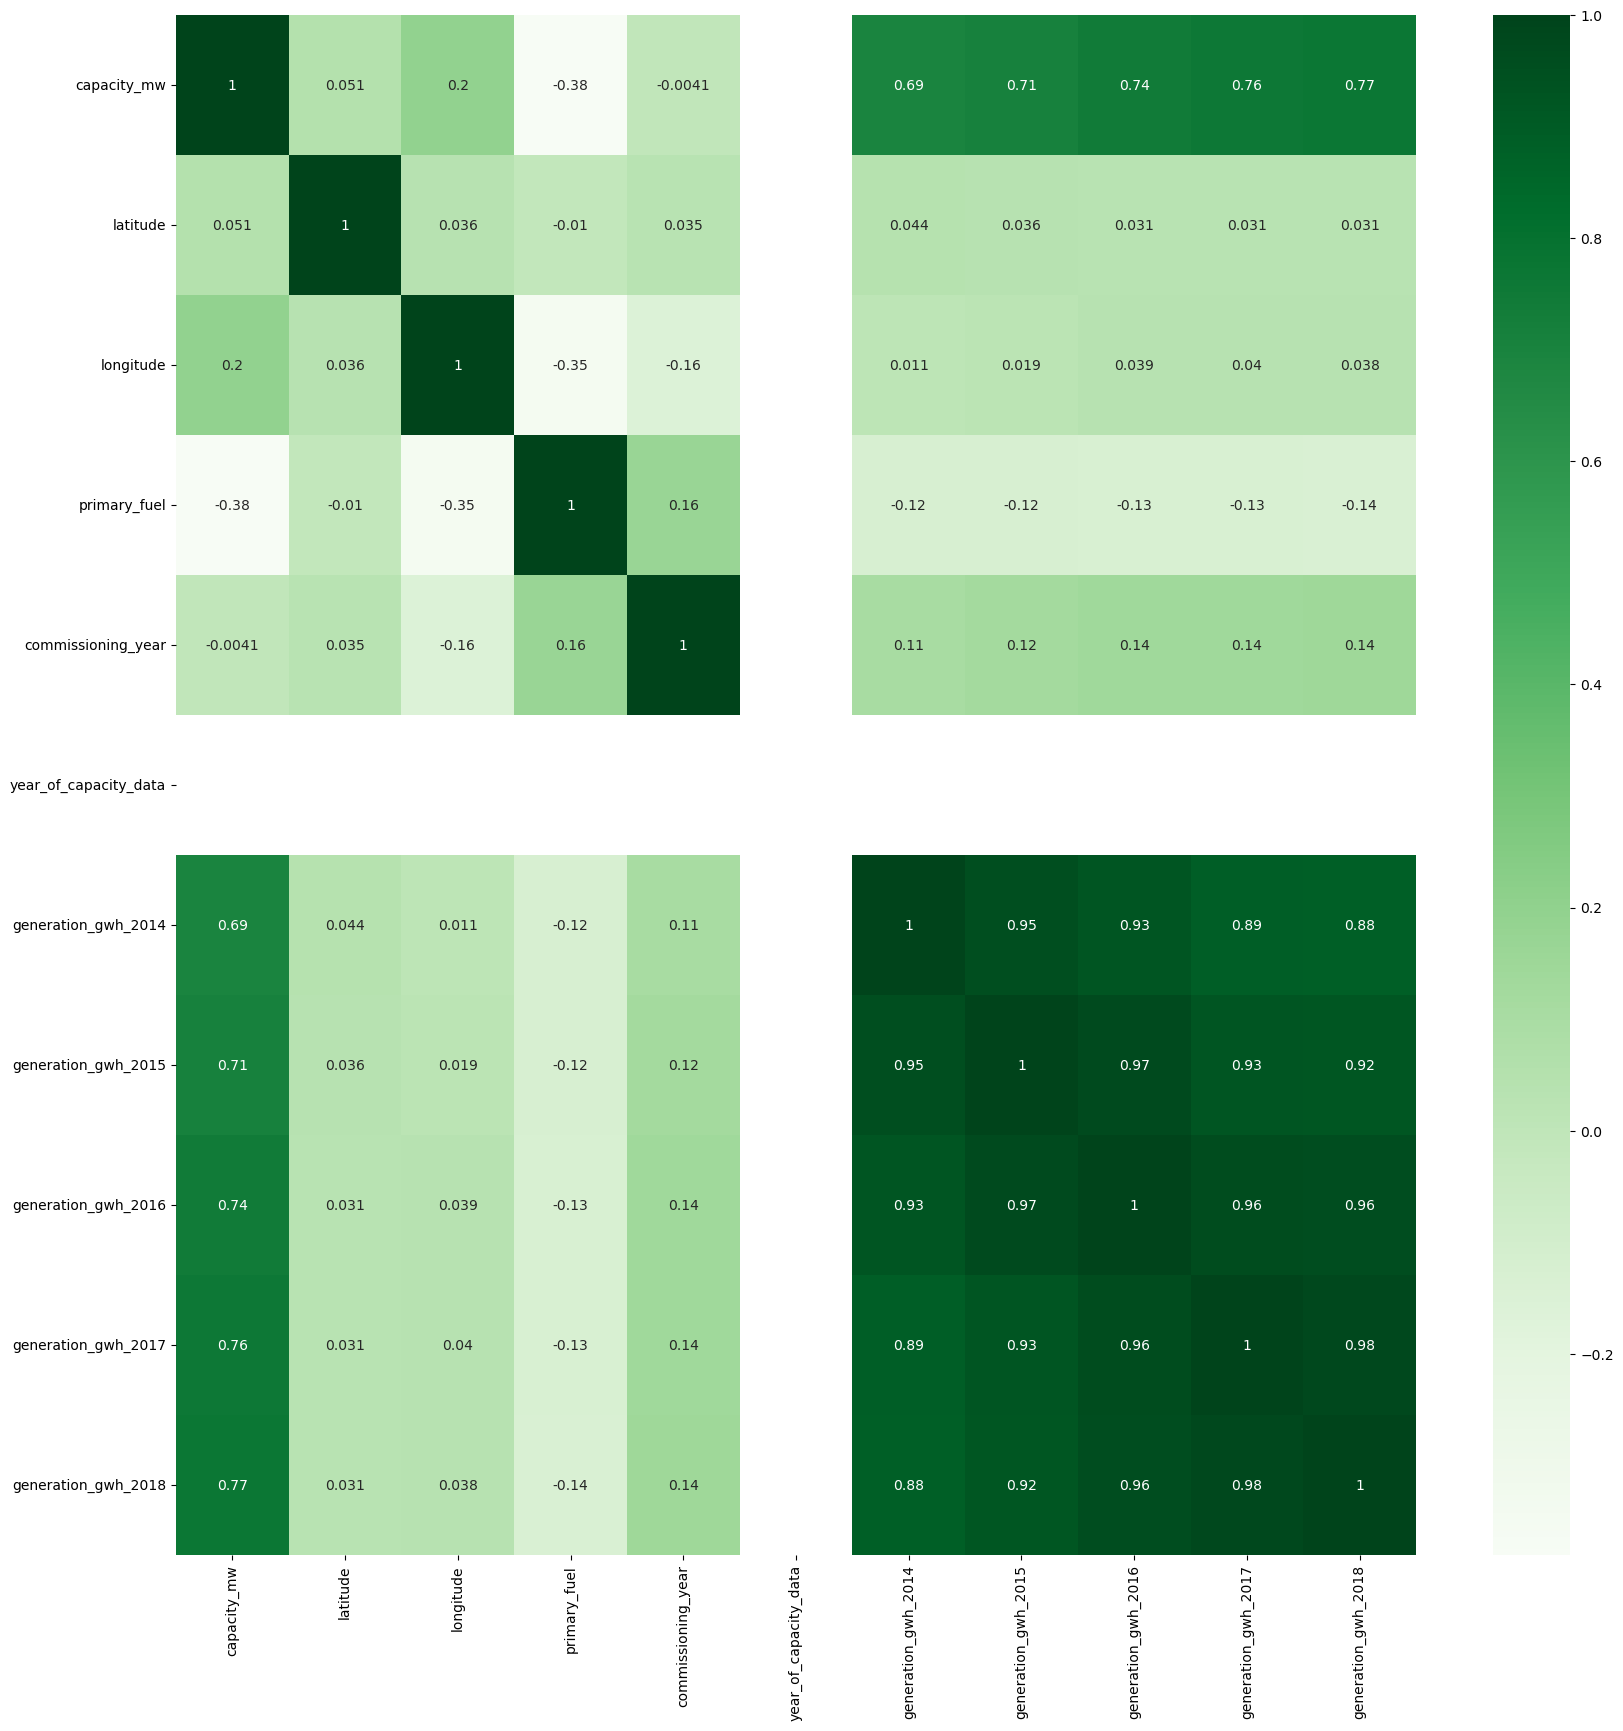

In [43]:
plt.figure(figsize=(20,20))
sns.heatmap(dfcor,annot=True,cmap='Greens')

By above Heatmap of features corelations, we observed that all 5 years generation growth having a very strong positive corelation with each other and also have a very good positive relationship with capacity mega watt. But the reporting year when the capacity informations were reported has no relation with any other features. So we can drop this columns also for our further process to make ML model.

In [44]:
df.drop(['year_of_capacity_data'],axis=1,inplace=True)

In [45]:
df.describe()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,3.206174,2004.594267,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,2.280652,15.734928,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1.000000,1998.000000,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,3.000000,2014.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,6.000000,2015.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,7.000000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


By using above describe method, we found that there is a large difference between the Mean & Median (50% Percentile) for "capacity_mw", so its a spreaded data. Also observed that there are differences between minimum values & 25% percentile and maximum values & 75% percentile in many columns, which indicates for the outliers possibilites in the dataset.

capacity_mw               AxesSubplot(0.125,0.53;0.133621x0.35)
latitude               AxesSubplot(0.285345,0.53;0.133621x0.35)
longitude               AxesSubplot(0.44569,0.53;0.133621x0.35)
primary_fuel           AxesSubplot(0.606034,0.53;0.133621x0.35)
commissioning_year     AxesSubplot(0.766379,0.53;0.133621x0.35)
generation_gwh_2014       AxesSubplot(0.125,0.11;0.133621x0.35)
generation_gwh_2015    AxesSubplot(0.285345,0.11;0.133621x0.35)
generation_gwh_2016     AxesSubplot(0.44569,0.11;0.133621x0.35)
generation_gwh_2017    AxesSubplot(0.606034,0.11;0.133621x0.35)
generation_gwh_2018    AxesSubplot(0.766379,0.11;0.133621x0.35)
dtype: object

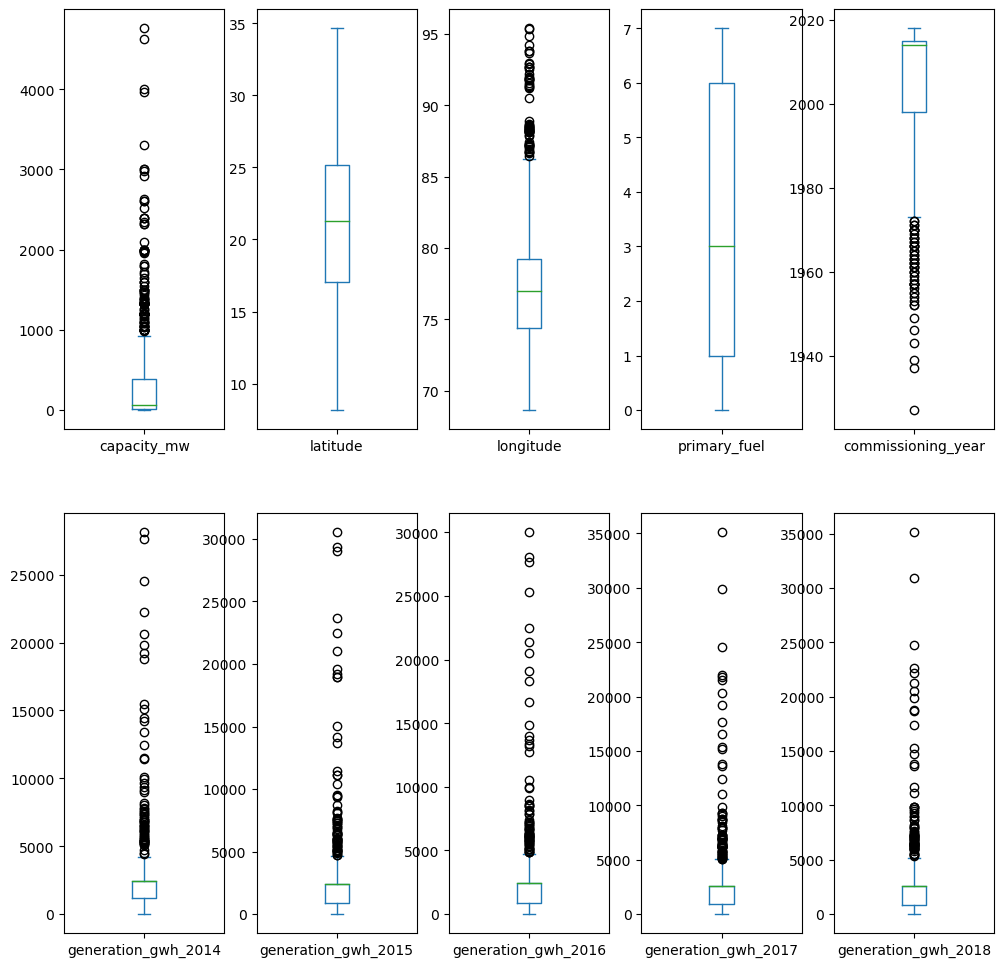

In [46]:
df.plot(kind='box',figsize=(12,12),layout=(2,5),subplots=True)

With the above boxplots also, the huge outliers are showing of many features

In [47]:
df.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.141881
primary_fuel           0.472251
commissioning_year    -1.714873
generation_gwh_2014    5.035446
generation_gwh_2015    5.364134
generation_gwh_2016    5.068427
generation_gwh_2017    5.110952
generation_gwh_2018    4.937907
dtype: float64

Big Skeness are also there in many features

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

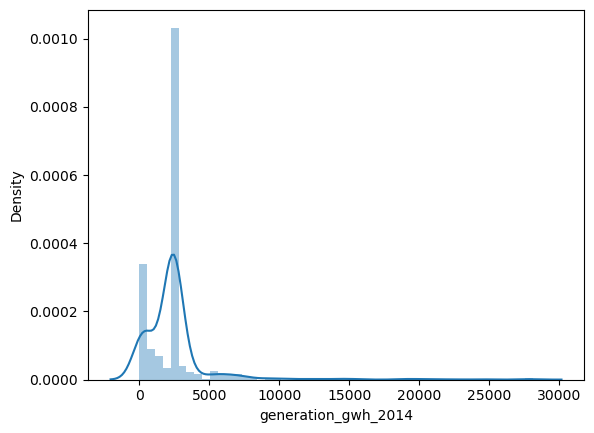

In [48]:
sns.distplot(df['generation_gwh_2014'])

In [49]:
df['generation_gwh_2014']=boxcox(df['generation_gwh_2014'],0.5)

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

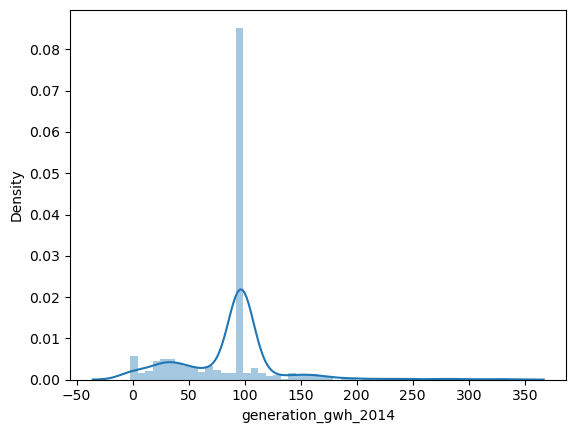

In [50]:
sns.distplot(df['generation_gwh_2014'])

<AxesSubplot:xlabel='generation_gwh_2014'>

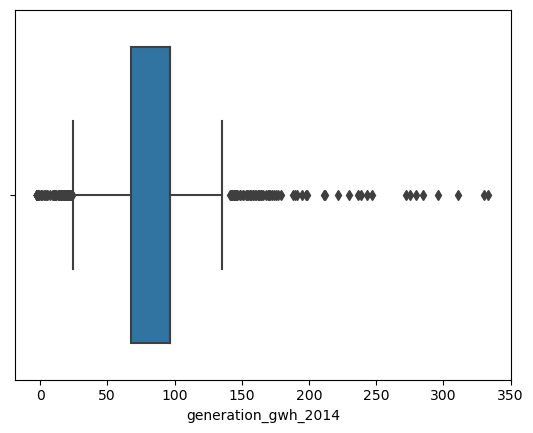

In [51]:
sns.boxplot(df['generation_gwh_2014'])

In [52]:
df['generation_gwh_2015']=boxcox(df['generation_gwh_2015'],0.5)

In [53]:
df['generation_gwh_2016']=boxcox(df['generation_gwh_2016'],0.5)

In [54]:
df['generation_gwh_2017']=boxcox(df['generation_gwh_2017'],0.5)

In [55]:
df['generation_gwh_2018']=boxcox(df['generation_gwh_2018'],0.5)

capacity_mw               AxesSubplot(0.125,0.53;0.133621x0.35)
latitude               AxesSubplot(0.285345,0.53;0.133621x0.35)
longitude               AxesSubplot(0.44569,0.53;0.133621x0.35)
primary_fuel           AxesSubplot(0.606034,0.53;0.133621x0.35)
commissioning_year     AxesSubplot(0.766379,0.53;0.133621x0.35)
generation_gwh_2014       AxesSubplot(0.125,0.11;0.133621x0.35)
generation_gwh_2015    AxesSubplot(0.285345,0.11;0.133621x0.35)
generation_gwh_2016     AxesSubplot(0.44569,0.11;0.133621x0.35)
generation_gwh_2017    AxesSubplot(0.606034,0.11;0.133621x0.35)
generation_gwh_2018    AxesSubplot(0.766379,0.11;0.133621x0.35)
dtype: object

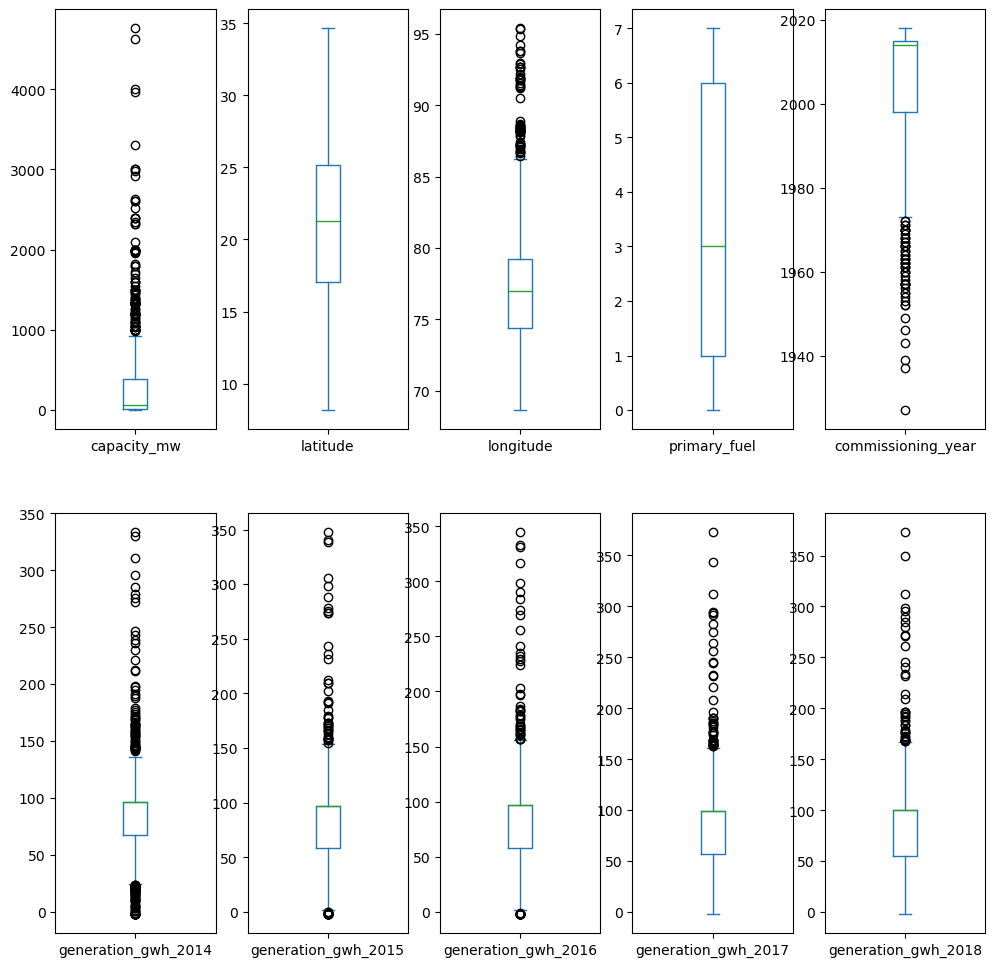

In [56]:
df.plot(kind='box',figsize=(12,12),layout=(2,5),subplots=True)

In [57]:
df.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.141881
primary_fuel           0.472251
commissioning_year    -1.714873
generation_gwh_2014    0.972850
generation_gwh_2015    1.049245
generation_gwh_2016    0.973783
generation_gwh_2017    0.893070
generation_gwh_2018    0.908129
dtype: float64

By using the boxcox transformation method, we have reduced the Skewness & the Outliers of many columns. But still these have outliers and little skewness. So we are going to transform these again by using numpy square root method.

In [58]:
df['generation_gwh_2014']=np.sqrt(df['generation_gwh_2014'])

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

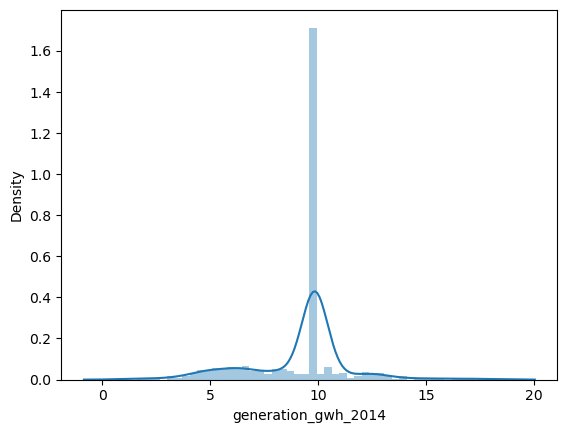

In [59]:
sns.distplot(df['generation_gwh_2014'])

<AxesSubplot:xlabel='generation_gwh_2014'>

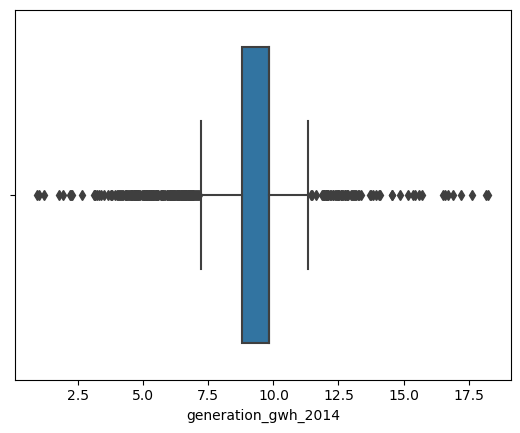

In [60]:
sns.boxplot(df['generation_gwh_2014'])

In [61]:
df['generation_gwh_2015']=np.sqrt(df['generation_gwh_2015'])

In [62]:
df['generation_gwh_2016']=np.sqrt(df['generation_gwh_2016'])

In [63]:
df['generation_gwh_2017']=np.sqrt(df['generation_gwh_2017'])

In [64]:
df['generation_gwh_2018']=np.sqrt(df['generation_gwh_2018'])

capacity_mw               AxesSubplot(0.125,0.53;0.133621x0.35)
latitude               AxesSubplot(0.285345,0.53;0.133621x0.35)
longitude               AxesSubplot(0.44569,0.53;0.133621x0.35)
primary_fuel           AxesSubplot(0.606034,0.53;0.133621x0.35)
commissioning_year     AxesSubplot(0.766379,0.53;0.133621x0.35)
generation_gwh_2014       AxesSubplot(0.125,0.11;0.133621x0.35)
generation_gwh_2015    AxesSubplot(0.285345,0.11;0.133621x0.35)
generation_gwh_2016     AxesSubplot(0.44569,0.11;0.133621x0.35)
generation_gwh_2017    AxesSubplot(0.606034,0.11;0.133621x0.35)
generation_gwh_2018    AxesSubplot(0.766379,0.11;0.133621x0.35)
dtype: object

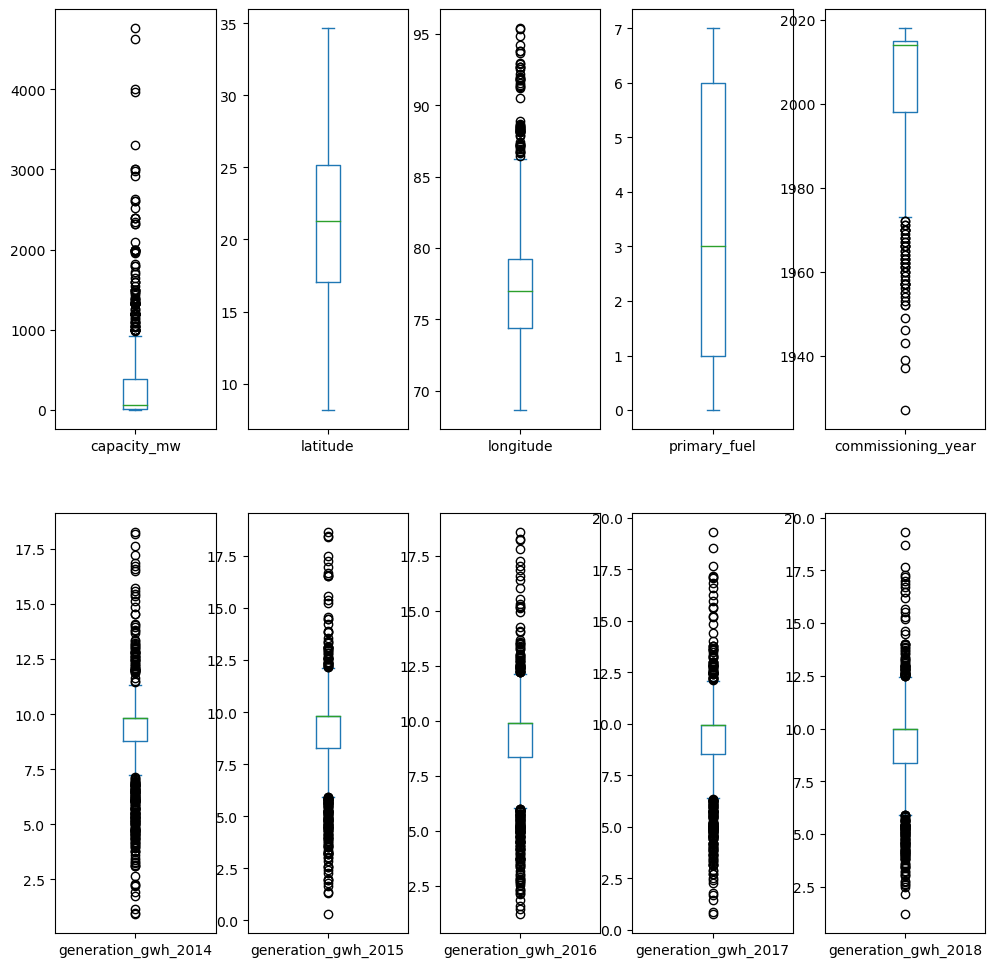

In [65]:
df.plot(kind='box',figsize=(12,12),layout=(2,5),subplots=True)

In [66]:
df.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.141881
primary_fuel           0.472251
commissioning_year    -1.714873
generation_gwh_2014   -0.437005
generation_gwh_2015   -0.451755
generation_gwh_2016   -0.425133
generation_gwh_2017   -0.441427
generation_gwh_2018   -0.312133
dtype: float64

<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

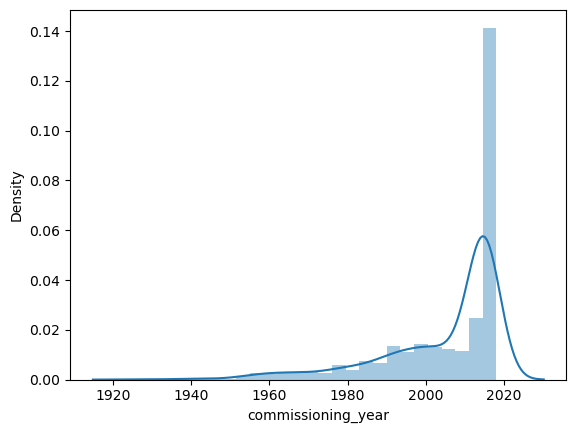

In [67]:
sns.distplot(df['commissioning_year'])

In [68]:
df['commissioning_year']=boxcox(df['commissioning_year'],0.5)

<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

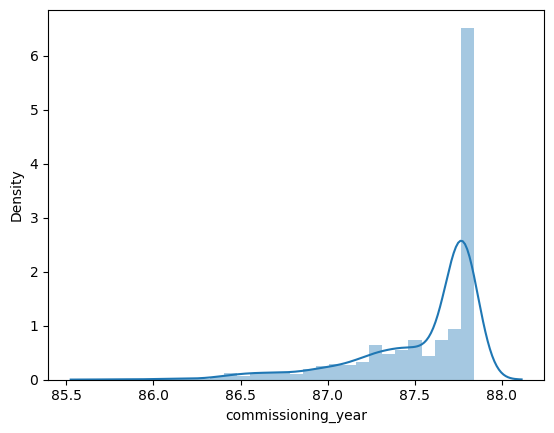

In [69]:
sns.distplot(df['commissioning_year'])

In [70]:
df['commissioning_year']=np.sqrt(df['commissioning_year'])

<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

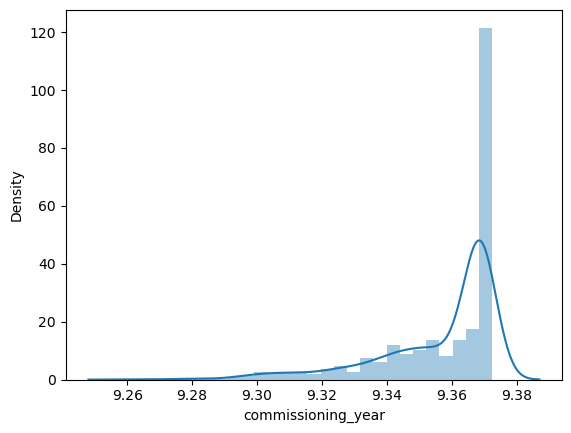

In [71]:
sns.distplot(df['commissioning_year'])

<AxesSubplot:xlabel='commissioning_year'>

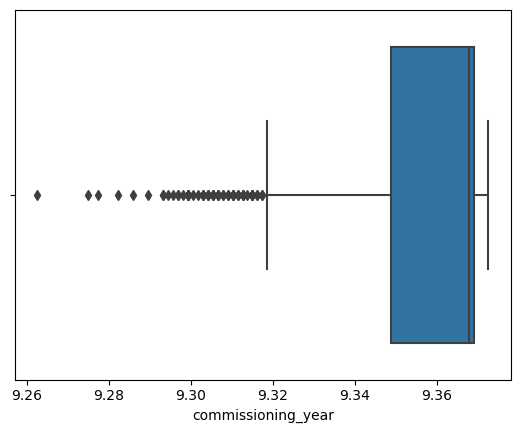

In [72]:
sns.boxplot(df['commissioning_year'])

<AxesSubplot:xlabel='longitude', ylabel='Density'>

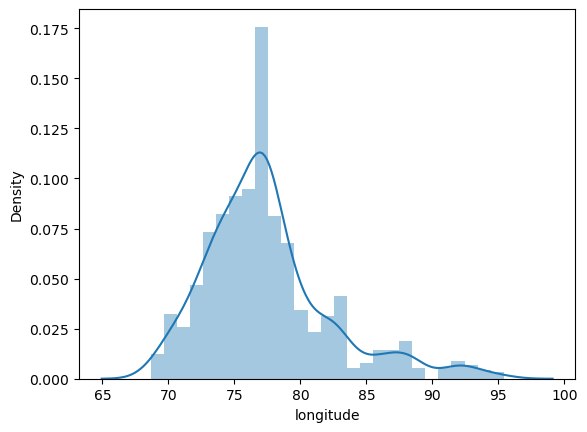

In [73]:
sns.distplot(df['longitude'])

In [74]:
df['longitude']=np.log(df['longitude'])

<AxesSubplot:xlabel='longitude', ylabel='Density'>

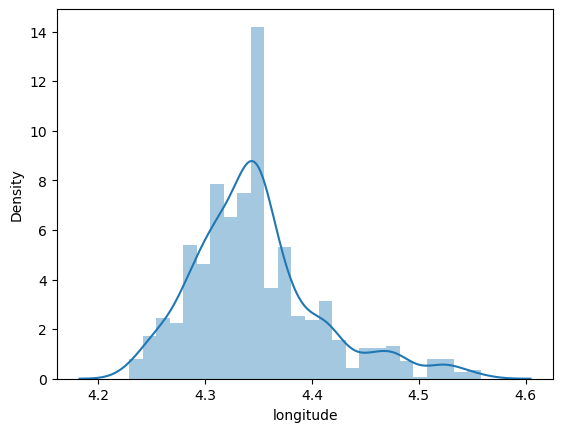

In [75]:
sns.distplot(df['longitude'])

<AxesSubplot:xlabel='longitude'>

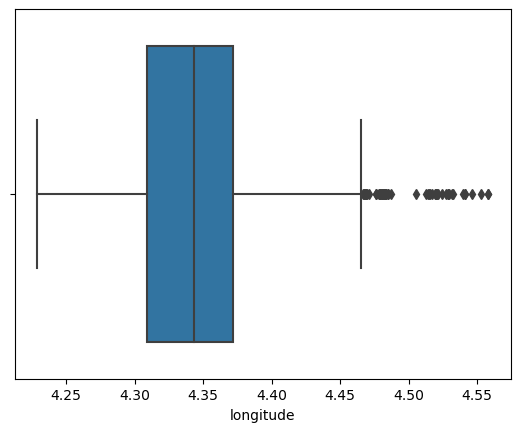

In [76]:
sns.boxplot(df['longitude'])

In [77]:
df.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              0.933111
primary_fuel           0.472251
commissioning_year    -1.730033
generation_gwh_2014   -0.437005
generation_gwh_2015   -0.451755
generation_gwh_2016   -0.425133
generation_gwh_2017   -0.441427
generation_gwh_2018   -0.312133
dtype: float64

After using many methods, we found that the skewness of commissioning year not moving towards zero and the outliers are also not reducing. As earlier the commissioning year was having 380 missing values and we were filled these missing values by the first mode of the column. So as the commissioning year feature is not very effective for the prediction of Primary Fuel & Capacity Mega Watt and its corelation is very low with capacity mw (-0.0041) & with primary fuel (0.16). We are going to drop this column also to pretect our ML model with the outlier and skewness of this feature.

In [78]:
df.drop(['commissioning_year'],axis=1,inplace=True)

capacity_mw               AxesSubplot(0.125,0.53;0.133621x0.35)
latitude               AxesSubplot(0.285345,0.53;0.133621x0.35)
longitude               AxesSubplot(0.44569,0.53;0.133621x0.35)
primary_fuel           AxesSubplot(0.606034,0.53;0.133621x0.35)
generation_gwh_2014    AxesSubplot(0.766379,0.53;0.133621x0.35)
generation_gwh_2015       AxesSubplot(0.125,0.11;0.133621x0.35)
generation_gwh_2016    AxesSubplot(0.285345,0.11;0.133621x0.35)
generation_gwh_2017     AxesSubplot(0.44569,0.11;0.133621x0.35)
generation_gwh_2018    AxesSubplot(0.606034,0.11;0.133621x0.35)
dtype: object

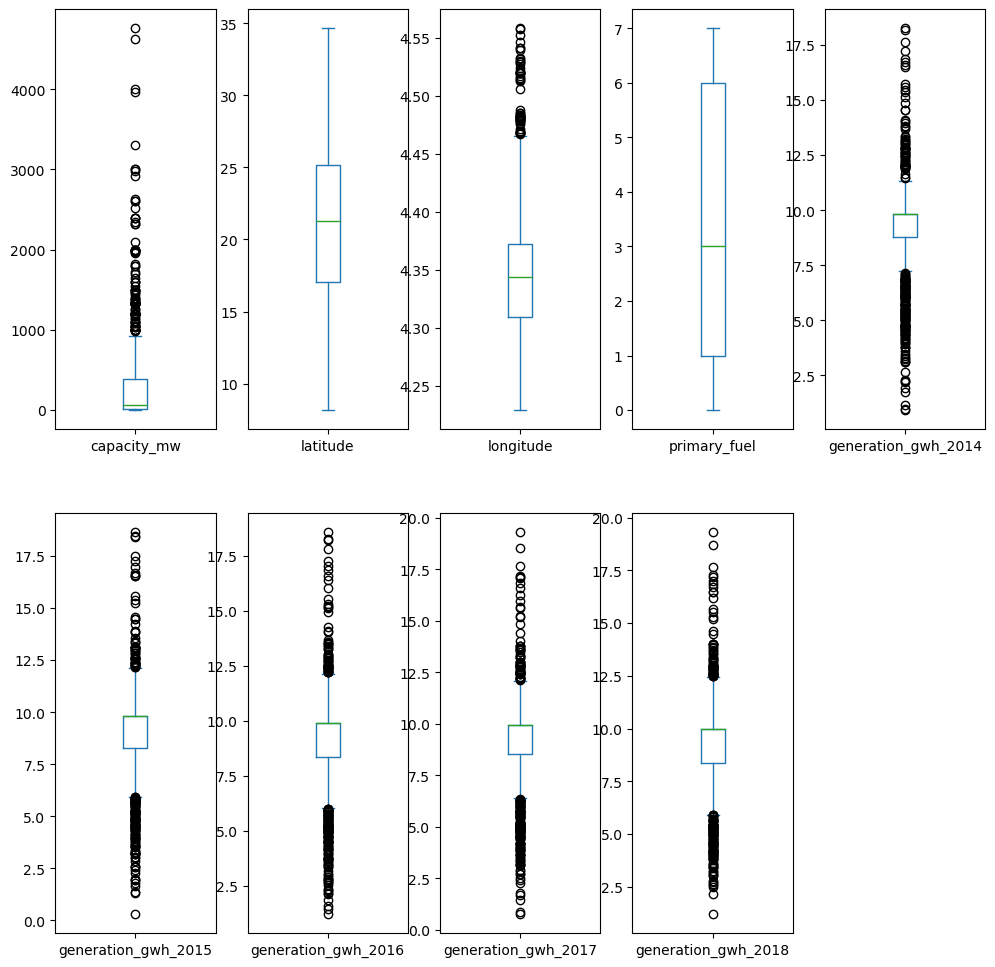

In [79]:
df.plot(kind='box',figsize=(12,12),layout=(2,5),subplots=True)

After the Feature Engineering and Data Preprocessing works, now we are going to transform rest of the Oject Data type column to Numeric columns by using Label Encoder, so that our ML model can read all features.

In [80]:
df.isna().sum()

country_long            0
name                    0
gppd_idnr               0
capacity_mw             0
latitude                0
longitude               0
primary_fuel            0
other_fuel1             0
geolocation_source      0
generation_gwh_2014    30
generation_gwh_2015    30
generation_gwh_2016    31
generation_gwh_2017    35
generation_gwh_2018    41
dtype: int64

During the transformation process, again some columns get missing values. So again we are filling the same with respective columns mean.

In [81]:
df.fillna(df.mean(),inplace=True)

In [82]:
for c in df.select_dtypes(include="object").columns:
    df[c]=le.fit_transform(df[c].astype(str))

In [83]:
df.dtypes

country_long             int32
name                     int32
gppd_idnr                int32
capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel             int32
other_fuel1              int32
geolocation_source       int32
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

So all the columns are now readable for machine learning, as of either integer or float types.

As we have to do 2 predictions (1) Primary Fuel of Classification Type Model & (2) Capacity Mega Watt of Linear Type (Regression Type) Model. We are going to save our refined data in 2 different variable for 2 different prediction tasks.

In [84]:
cdf=df

In [85]:
ldf=df

For classification model, we have to predict Primary Fuel, so we are going to send it at the last column

In [86]:
Target1=cdf.pop('primary_fuel')

In [87]:
cdf.shape

(907, 13)

In [88]:
cdf.insert(13,'primary_fuel',Target1)

In [89]:
cdf

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,other_fuel1,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,primary_fuel
0,0,0,657,2.5,28.1839,4.293751,2,1,9.829906,9.826194,9.866948,9.947395,9.999808,6
1,0,1,519,98.0,24.7663,4.312261,2,2,9.829906,9.826194,9.866948,9.947395,9.999808,1
2,0,2,853,39.2,21.9038,4.239501,2,2,9.829906,9.826194,9.866948,9.947395,9.999808,7
3,0,3,0,135.0,23.8712,4.514810,2,2,6.907296,7.489636,7.584962,7.037588,6.931778,2
4,0,4,1,1800.0,21.9603,4.411696,2,2,10.401522,12.322171,12.491009,12.032166,12.985920,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,902,491,1600.0,16.2949,4.348428,2,2,9.829906,9.071018,5.344880,7.538923,7.099457,1
903,0,903,822,3.0,12.8932,4.358827,2,0,9.829906,9.826194,9.866948,9.947395,9.999808,6
904,0,904,891,25.5,15.2758,4.325206,2,2,9.829906,9.826194,9.866948,9.947395,9.999808,7
905,0,905,539,80.0,24.3500,4.300650,2,2,9.829906,9.826194,9.866948,9.947395,9.999808,1


In [90]:
cx=cdf.iloc[:,0:-1]

In [91]:
cy=cdf.iloc[:,-1]

In [92]:
cx.shape

(907, 13)

In [93]:
cy.shape

(907,)

country_long              AxesSubplot(0.125,0.653529;0.133621x0.226471)
name                   AxesSubplot(0.285345,0.653529;0.133621x0.226471)
gppd_idnr               AxesSubplot(0.44569,0.653529;0.133621x0.226471)
capacity_mw            AxesSubplot(0.606034,0.653529;0.133621x0.226471)
latitude               AxesSubplot(0.766379,0.653529;0.133621x0.226471)
longitude                 AxesSubplot(0.125,0.381765;0.133621x0.226471)
other_fuel1            AxesSubplot(0.285345,0.381765;0.133621x0.226471)
geolocation_source      AxesSubplot(0.44569,0.381765;0.133621x0.226471)
generation_gwh_2014    AxesSubplot(0.606034,0.381765;0.133621x0.226471)
generation_gwh_2015    AxesSubplot(0.766379,0.381765;0.133621x0.226471)
generation_gwh_2016           AxesSubplot(0.125,0.11;0.133621x0.226471)
generation_gwh_2017        AxesSubplot(0.285345,0.11;0.133621x0.226471)
generation_gwh_2018         AxesSubplot(0.44569,0.11;0.133621x0.226471)
primary_fuel               AxesSubplot(0.606034,0.11;0.133621x0.

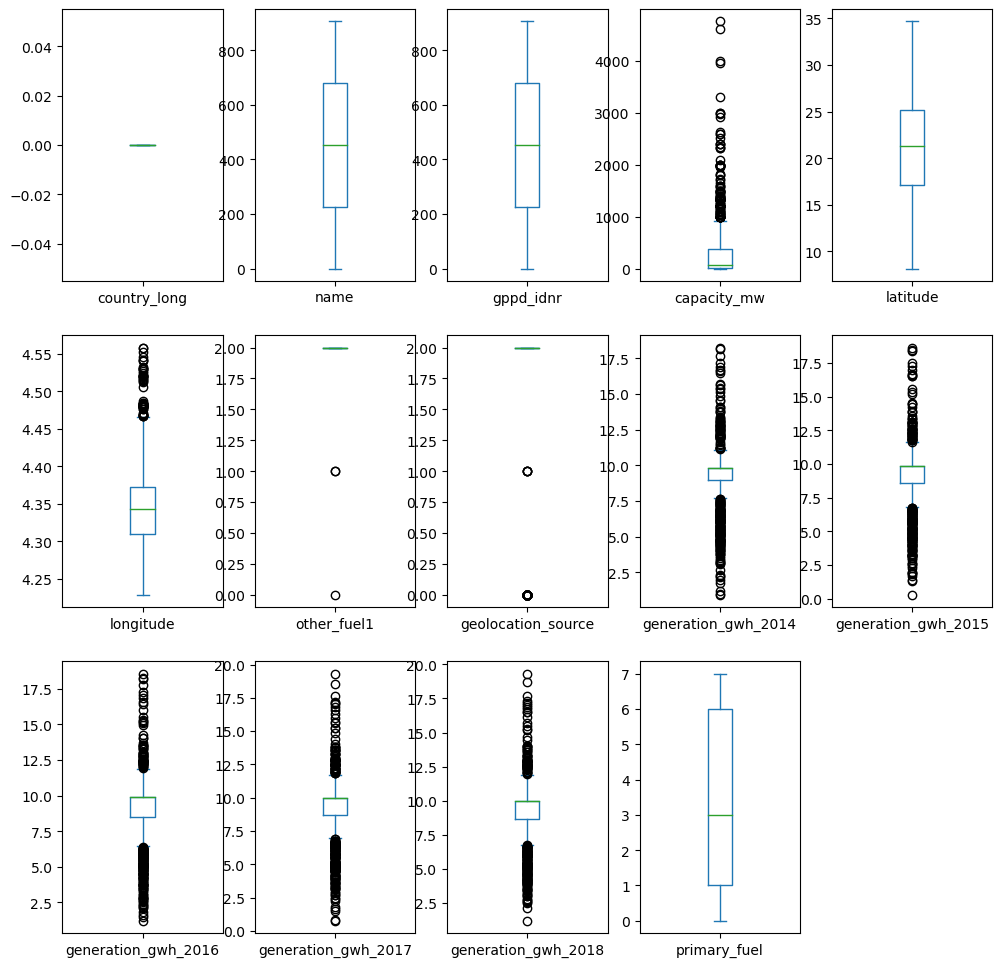

In [94]:
cdf.plot(kind='box',figsize=(12,12),layout=(3,5),subplots=True)

Because for the prediction of Primary Fuel, the Capacity Mega Watt is our independent variable we are trying to reduce its outliers by using boxcox method.

In [95]:
cdf['capacity_mw']=boxcox(cdf['capacity_mw'],0.5)

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

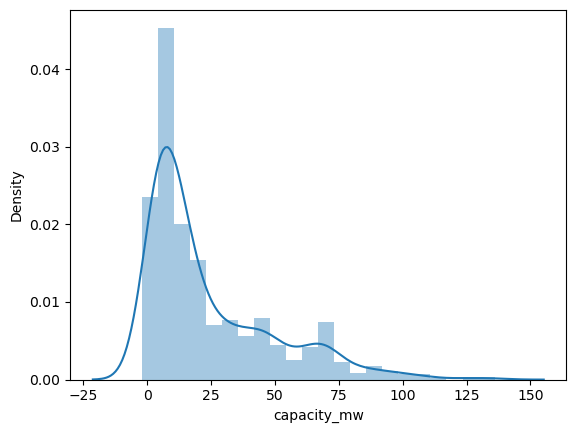

In [96]:
sns.distplot(cdf['capacity_mw'])

<AxesSubplot:xlabel='capacity_mw'>

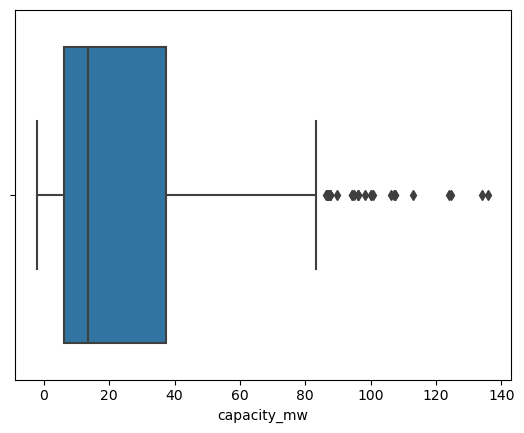

In [97]:
sns.boxplot(cdf['capacity_mw'])

country_long              AxesSubplot(0.125,0.653529;0.133621x0.226471)
name                   AxesSubplot(0.285345,0.653529;0.133621x0.226471)
gppd_idnr               AxesSubplot(0.44569,0.653529;0.133621x0.226471)
capacity_mw            AxesSubplot(0.606034,0.653529;0.133621x0.226471)
latitude               AxesSubplot(0.766379,0.653529;0.133621x0.226471)
longitude                 AxesSubplot(0.125,0.381765;0.133621x0.226471)
other_fuel1            AxesSubplot(0.285345,0.381765;0.133621x0.226471)
geolocation_source      AxesSubplot(0.44569,0.381765;0.133621x0.226471)
generation_gwh_2014    AxesSubplot(0.606034,0.381765;0.133621x0.226471)
generation_gwh_2015    AxesSubplot(0.766379,0.381765;0.133621x0.226471)
generation_gwh_2016           AxesSubplot(0.125,0.11;0.133621x0.226471)
generation_gwh_2017        AxesSubplot(0.285345,0.11;0.133621x0.226471)
generation_gwh_2018         AxesSubplot(0.44569,0.11;0.133621x0.226471)
primary_fuel               AxesSubplot(0.606034,0.11;0.133621x0.

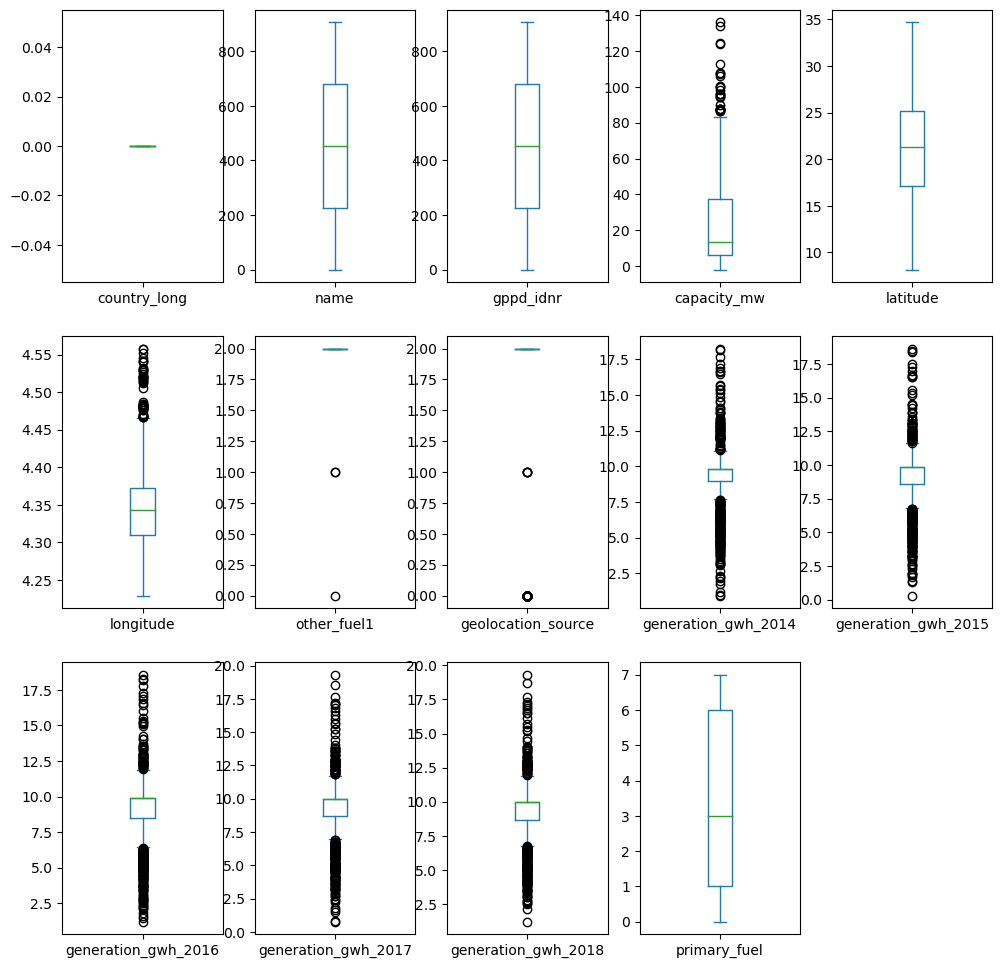

In [98]:
cdf.plot(kind='box',figsize=(12,12),layout=(3,5),subplots=True)

As per our opinion, now for cdf dataset is good enough for our further classification model making process. So we are going to apply different classification algorithms via different random states to check and get the best one.

In [99]:
lg=LogisticRegression()

In [100]:
for i in range(0,50):
    cxtrain,cxtest,cytrain,cytest=train_test_split(cx,cy,test_size=0.30,random_state=i)
    lg.fit(cxtrain,cytrain)
    cpred1=lg.predict(cxtest)
    ascore=accuracy_score(cytest,cpred1)
    print(ascore)

0.6446886446886447
0.6336996336996337
0.6227106227106227
0.673992673992674
0.6117216117216118
0.6483516483516484
0.652014652014652
0.6007326007326007
0.6373626373626373
0.6593406593406593
0.663003663003663
0.6227106227106227
0.6153846153846154
0.6410256410256411
0.684981684981685
0.652014652014652
0.6043956043956044
0.6593406593406593
0.6666666666666666
0.6263736263736264
0.6410256410256411
0.6373626373626373
0.5860805860805861
0.6483516483516484
0.6153846153846154
0.663003663003663
0.652014652014652
0.6153846153846154
0.6153846153846154
0.6043956043956044
0.6556776556776557
0.6190476190476191
0.6227106227106227
0.6263736263736264
0.6446886446886447
0.6153846153846154
0.63003663003663
0.63003663003663
0.6446886446886447
0.6227106227106227
0.6483516483516484
0.6227106227106227
0.6373626373626373
0.6263736263736264
0.652014652014652
0.6153846153846154
0.608058608058608
0.6153846153846154
0.6263736263736264
0.6666666666666666


In [101]:
dt=DecisionTreeClassifier()

In [102]:
for i in range(0,50):
    cxtrain,cxtest,cytrain,cytest=train_test_split(cx,cy,test_size=0.30,random_state=i)
    dt.fit(cxtrain,cytrain)
    cpred2=dt.predict(cxtest)
    ascore=accuracy_score(cytest,cpred2)
    print(ascore)

0.8168498168498168
0.7875457875457875
0.7765567765567766
0.8205128205128205
0.8021978021978022
0.7765567765567766
0.7326007326007326
0.7765567765567766
0.7765567765567766
0.8058608058608059
0.7985347985347986
0.8168498168498168
0.7912087912087912
0.7728937728937729
0.7765567765567766
0.8205128205128205
0.7985347985347986
0.8498168498168498
0.7948717948717948
0.7838827838827839
0.7838827838827839
0.7765567765567766
0.8168498168498168
0.8315018315018315
0.8168498168498168
0.8131868131868132
0.7802197802197802
0.7765567765567766
0.7948717948717948
0.8168498168498168
0.7765567765567766
0.7875457875457875
0.7875457875457875
0.7728937728937729
0.7692307692307693
0.7838827838827839
0.7838827838827839
0.8315018315018315
0.8058608058608059
0.7838827838827839
0.7362637362637363
0.8058608058608059
0.8021978021978022
0.7728937728937729
0.7912087912087912
0.7838827838827839
0.7948717948717948
0.7948717948717948
0.7802197802197802
0.7985347985347986


In [103]:
confusion_matrix(cytest,cpred2)

array([[12,  3,  1,  0,  0,  0,  0,  0],
       [ 4, 65,  6,  6,  1,  1,  0,  0],
       [ 0,  4,  5,  4,  1,  3,  0,  0],
       [ 0, 10,  5, 64,  0,  0,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33]], dtype=int64)

In [104]:
gb=GaussianNB()

In [105]:
for i in range(0,50):
    cxtrain,cxtest,cytrain,cytest=train_test_split(cx,cy,test_size=0.30,random_state=i)
    gb.fit(cxtrain,cytrain)
    cpred3=gb.predict(cxtest)
    ascore=accuracy_score(cytest,cpred3)
    print(ascore)

0.5824175824175825
0.6556776556776557
0.6227106227106227
0.6117216117216118
0.6373626373626373
0.717948717948718
0.6227106227106227
0.6336996336996337
0.6666666666666666
0.6959706959706959
0.6776556776556777
0.608058608058608
0.6446886446886447
0.6263736263736264
0.6593406593406593
0.6446886446886447
0.6593406593406593
0.6666666666666666
0.652014652014652
0.6153846153846154
0.6483516483516484
0.6556776556776557
0.6666666666666666
0.6483516483516484
0.6007326007326007
0.6923076923076923
0.5787545787545788
0.6190476190476191
0.652014652014652
0.6336996336996337
0.6483516483516484
0.6263736263736264
0.6043956043956044
0.6227106227106227
0.6556776556776557
0.652014652014652
0.5860805860805861
0.6410256410256411
0.6446886446886447
0.6410256410256411
0.652014652014652
0.6227106227106227
0.6190476190476191
0.652014652014652
0.6886446886446886
0.608058608058608
0.6703296703296703
0.6190476190476191
0.663003663003663
0.6666666666666666


In [106]:
bn=BernoulliNB()

In [107]:
for i in range(0,50):
    cxtrain,cxtest,cytrain,cytest=train_test_split(cx,cy,test_size=0.30,random_state=i)
    bn.fit(cxtrain,cytrain)
    cpred4=bn.predict(cxtest)
    ascore=accuracy_score(cytest,cpred4)
    print(ascore)

0.3663003663003663
0.4249084249084249
0.37362637362637363
0.38095238095238093
0.45054945054945056
0.4175824175824176
0.41025641025641024
0.4065934065934066
0.39194139194139194
0.39194139194139194
0.4175824175824176
0.42124542124542125
0.4249084249084249
0.3882783882783883
0.3992673992673993
0.41025641025641024
0.3772893772893773
0.4065934065934066
0.4139194139194139
0.4175824175824176
0.40293040293040294
0.4432234432234432
0.41025641025641024
0.43223443223443225
0.38461538461538464
0.4175824175824176
0.39194139194139194
0.4542124542124542
0.42124542124542125
0.40293040293040294
0.3956043956043956
0.3882783882783883
0.42857142857142855
0.41025641025641024
0.3992673992673993
0.3882783882783883
0.358974358974359
0.38095238095238093
0.37362637362637363
0.38095238095238093
0.3992673992673993
0.3882783882783883
0.358974358974359
0.3956043956043956
0.42124542124542125
0.4065934065934066
0.41025641025641024
0.36996336996337
0.38461538461538464
0.4249084249084249


In [108]:
rf=RandomForestClassifier()

In [109]:
for i in range(0,50):
    cxtrain,cxtest,cytrain,cytest=train_test_split(cx,cy,test_size=0.30,random_state=i)
    rf.fit(cxtrain,cytrain)
    cpred5=rf.predict(cxtest)
    ascore=accuracy_score(cytest,cpred5)
    print(ascore)

0.8791208791208791
0.8315018315018315
0.8021978021978022
0.8241758241758241
0.8424908424908425
0.8388278388278388
0.8131868131868132
0.8168498168498168
0.8388278388278388
0.8388278388278388
0.8424908424908425
0.8388278388278388
0.8461538461538461
0.8424908424908425
0.8571428571428571
0.8608058608058609
0.8241758241758241
0.8388278388278388
0.8388278388278388
0.8315018315018315
0.8534798534798534
0.8681318681318682
0.8424908424908425
0.8608058608058609
0.8058608058608059
0.8608058608058609
0.8241758241758241
0.8278388278388278
0.8168498168498168
0.8498168498168498
0.8534798534798534
0.8424908424908425
0.8168498168498168
0.8241758241758241
0.8351648351648352
0.8168498168498168
0.8095238095238095
0.8388278388278388
0.8461538461538461
0.8278388278388278
0.8388278388278388
0.8278388278388278
0.8168498168498168
0.8095238095238095
0.8424908424908425
0.8241758241758241
0.8461538461538461
0.8241758241758241
0.8461538461538461
0.8131868131868132


In [110]:
confusion_matrix(cytest,cpred5)

array([[15,  1,  0,  0,  0,  0,  0,  0],
       [ 2, 67,  6,  7,  0,  1,  0,  0],
       [ 0,  7,  1,  5,  0,  4,  0,  0],
       [ 0,  9,  1, 69,  0,  0,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0],
       [ 0,  1,  1,  2,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33]], dtype=int64)

In [111]:
kn=KNeighborsClassifier()

In [112]:
for i in range(0,50):
    cxtrain,cxtest,cytrain,cytest=train_test_split(cx,cy,test_size=0.30,random_state=i)
    kn.fit(cxtrain,cytrain)
    cpred6=kn.predict(cxtest)
    ascore=accuracy_score(cytest,cpred6)
    print(ascore)

0.6996336996336996
0.7032967032967034
0.652014652014652
0.673992673992674
0.7472527472527473
0.6813186813186813
0.7106227106227107
0.673992673992674
0.7106227106227107
0.7435897435897436
0.7106227106227107
0.706959706959707
0.7142857142857143
0.7106227106227107
0.6813186813186813
0.7289377289377289
0.6813186813186813
0.7142857142857143
0.706959706959707
0.6666666666666666
0.717948717948718
0.7216117216117216
0.6776556776556777
0.73992673992674
0.717948717948718
0.7106227106227107
0.684981684981685
0.6703296703296703
0.6813186813186813
0.6483516483516484
0.7142857142857143
0.7032967032967034
0.673992673992674
0.6813186813186813
0.7106227106227107
0.6886446886446886
0.663003663003663
0.6886446886446886
0.6923076923076923
0.6886446886446886
0.6813186813186813
0.6776556776556777
0.652014652014652
0.6813186813186813
0.7252747252747253
0.6556776556776557
0.684981684981685
0.6446886446886447
0.7032967032967034
0.7032967032967034


In [113]:
sg=SGDClassifier()

In [114]:
for i in range(0,50):
    cxtrain,cxtest,cytrain,cytest=train_test_split(cx,cy,test_size=0.30,random_state=i)
    sg.fit(cxtrain,cytrain)
    cpred7=sg.predict(cxtest)
    ascore=accuracy_score(cytest,cpred7)
    print(ascore)

0.39194139194139194
0.4981684981684982
0.4725274725274725
0.38461538461538464
0.36996336996337
0.5164835164835165
0.4835164835164835
0.3663003663003663
0.40293040293040294
0.4725274725274725
0.5824175824175825
0.4652014652014652
0.5421245421245421
0.5641025641025641
0.5494505494505495
0.4908424908424908
0.5384615384615384
0.5164835164835165
0.36996336996337
0.45787545787545786
0.5238095238095238
0.5164835164835165
0.5421245421245421
0.5494505494505495
0.5201465201465202
0.6117216117216118
0.4945054945054945
0.41025641025641024
0.5091575091575091
0.3772893772893773
0.31135531135531136
0.5054945054945055
0.5531135531135531
0.5274725274725275
0.5201465201465202
0.5604395604395604
0.5384615384615384
0.5311355311355311
0.5347985347985348
0.4249084249084249
0.46886446886446886
0.45054945054945056
0.5934065934065934
0.5274725274725275
0.5347985347985348
0.326007326007326
0.5567765567765568
0.608058608058608
0.5494505494505495
0.6153846153846154


In [115]:
rg=RidgeClassifier()

In [116]:
for i in range(0,50):
    cxtrain,cxtest,cytrain,cytest=train_test_split(cx,cy,test_size=0.30,random_state=i)
    rg.fit(cxtrain,cytrain)
    cpred8=rg.predict(cxtest)
    ascore=accuracy_score(cytest,cpred8)
    print(ascore)

0.6996336996336996
0.673992673992674
0.652014652014652
0.6923076923076923
0.652014652014652
0.7142857142857143
0.673992673992674
0.6666666666666666
0.7106227106227107
0.6886446886446886
0.684981684981685
0.673992673992674
0.652014652014652
0.684981684981685
0.717948717948718
0.717948717948718
0.6666666666666666
0.6776556776556777
0.6923076923076923
0.663003663003663
0.6813186813186813
0.6703296703296703
0.663003663003663
0.7252747252747253
0.673992673992674
0.6923076923076923
0.6959706959706959
0.663003663003663
0.6593406593406593
0.6703296703296703
0.6996336996336996
0.6556776556776557
0.652014652014652
0.663003663003663
0.6996336996336996
0.652014652014652
0.6593406593406593
0.673992673992674
0.6703296703296703
0.652014652014652
0.6813186813186813
0.6703296703296703
0.6703296703296703
0.663003663003663
0.6813186813186813
0.6410256410256411
0.6776556776556777
0.6446886446886447
0.6959706959706959
0.684981684981685


Among above all applied Algos, we got good results via Decision Tree Classifier and Random Forest Classfier, and by comparing these 2 Algos the Random Forest Classifier is giving to best possible results of above 87% accurate prediction in random state 16, so we will use this one for our further process.

In [117]:
cv1=cross_val_score(rf,cx,cy,cv=KFold(n_splits=10))

In [118]:
cv1

array([0.8021978 , 0.83516484, 0.84615385, 0.76923077, 0.85714286,
       0.83516484, 0.81318681, 0.86666667, 0.83333333, 0.83333333])

In [119]:
cv1.mean()

0.8291575091575091

In [120]:
cv2=cross_val_score(rf,cx,cy,cv=StratifiedKFold(n_splits=10))

In [121]:
cv2

array([0.82417582, 0.85714286, 0.89010989, 0.83516484, 0.9010989 ,
       0.84615385, 0.81318681, 0.83333333, 0.84444444, 0.86666667])

In [122]:
cv2.mean()

0.8511477411477412

In [123]:
cv3=cross_val_score(rf,cx,cy,cv=ShuffleSplit(train_size=0.7,test_size=0.3,n_splits=10))

In [124]:
cv3

array([0.83882784, 0.80952381, 0.8021978 , 0.82051282, 0.84981685,
       0.84249084, 0.81684982, 0.87545788, 0.85347985, 0.83150183])

In [125]:
cv3.mean()

0.834065934065934

By using above 3 methods of Cross Validations with 10 Folds each also, we are getting the good output of an average between 83% to 85% for each method.

In [126]:
gs1=GridSearchCV(estimator=rf,param_grid={'max_depth':[2,4,6],'max_features':[4,5],'min_samples_leaf':[2,3,4]},scoring='accuracy',cv=9,refit=True,return_train_score=True)

In [127]:
gs1.fit(cxtrain,cytrain)

GridSearchCV(cv=9, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 6], 'max_features': [4, 5],
                         'min_samples_leaf': [2, 3, 4]},
             return_train_score=True, scoring='accuracy')

In [128]:
hypred=gs1.best_estimator_.predict(cxtest)

In [129]:
accuracy_score(cytest,hypred)

0.8205128205128205

In [130]:
confusion_matrix(cytest,hypred)

array([[14,  2,  0,  0,  0,  0,  0,  0],
       [ 3, 69,  3,  8,  0,  0,  0,  0],
       [ 1, 10,  1,  5,  0,  0,  0,  0],
       [ 0,  7,  0, 72,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0,  0,  0,  0],
       [ 1,  2,  1,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33]], dtype=int64)

As per the above Hyperparameter Tunings with different param grids also, we are getting a good result of above 82% predicted accuracy with a fine diagonal confusion matrix. So we are going to save our rf ML Model (Random Forest Model with Hyperparameter Tuning) via pickle dump method.

In [131]:
pickle.dump(gs1, open('primary fuel', 'wb'))

In [132]:
gs1_model=pickle.load(open('primary fuel', 'rb'))

In [133]:
gs1_model_pred=gs1_model.predict(cxtest)

In [134]:
gs1_model_pred

array([1, 7, 6, 1, 1, 1, 1, 3, 1, 7, 7, 7, 1, 3, 1, 1, 1, 1, 1, 7, 1, 7,
       1, 7, 0, 0, 1, 3, 6, 1, 1, 3, 3, 3, 3, 1, 1, 1, 7, 1, 3, 1, 1, 3,
       3, 3, 6, 0, 3, 3, 6, 3, 7, 3, 1, 1, 1, 1, 6, 1, 0, 1, 1, 3, 0, 6,
       1, 6, 1, 6, 1, 2, 6, 3, 3, 3, 3, 0, 6, 1, 1, 3, 6, 3, 7, 3, 1, 3,
       1, 0, 3, 3, 3, 3, 6, 0, 1, 1, 3, 0, 0, 3, 0, 1, 1, 1, 1, 1, 7, 6,
       0, 1, 3, 1, 1, 3, 7, 7, 1, 3, 3, 3, 7, 1, 3, 3, 0, 2, 0, 1, 7, 6,
       1, 2, 3, 7, 1, 6, 1, 1, 3, 3, 1, 3, 7, 1, 1, 1, 1, 3, 6, 3, 1, 6,
       1, 1, 6, 3, 6, 6, 1, 7, 3, 6, 3, 1, 7, 3, 7, 3, 7, 1, 3, 3, 3, 1,
       7, 3, 0, 3, 3, 3, 3, 7, 3, 0, 1, 7, 3, 7, 6, 3, 1, 3, 2, 3, 7, 1,
       3, 3, 3, 1, 3, 2, 3, 6, 6, 1, 1, 6, 1, 6, 1, 1, 6, 7, 6, 1, 6, 6,
       7, 6, 1, 3, 3, 3, 3, 1, 1, 3, 1, 3, 6, 3, 3, 7, 3, 6, 0, 3, 3, 3,
       3, 3, 1, 7, 3, 1, 1, 1, 7, 1, 6, 3, 6, 1, 1, 1, 3, 7, 1, 3, 3, 1,
       0, 3, 3, 1, 7, 1, 1, 0, 1])

In [135]:
accuracy_score(cytest,gs1_model_pred)

0.8205128205128205

In [136]:
confusion_matrix(cytest,gs1_model_pred)

array([[14,  2,  0,  0,  0,  0,  0,  0],
       [ 3, 69,  3,  8,  0,  0,  0,  0],
       [ 1, 10,  1,  5,  0,  0,  0,  0],
       [ 0,  7,  0, 72,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0,  0,  0,  0],
       [ 1,  2,  1,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33]], dtype=int64)

By applying our saved Classification ML Model, we are getting a good prediction accuracy of approximately 82% with the diagonal valued confusion matrix.

Now we are going to make our second ML model for continueous type Target variable Capacity Mega Watt, i.e. linear model

In [137]:
ldf

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,other_fuel1,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,primary_fuel
0,0,0,657,1.162278,28.1839,4.293751,2,1,9.829906,9.826194,9.866948,9.947395,9.999808,6
1,0,1,519,17.798990,24.7663,4.312261,2,2,9.829906,9.826194,9.866948,9.947395,9.999808,1
2,0,2,853,10.521981,21.9038,4.239501,2,2,9.829906,9.826194,9.866948,9.947395,9.999808,7
3,0,3,0,21.237900,23.8712,4.514810,2,2,6.907296,7.489636,7.584962,7.037588,6.931778,2
4,0,4,1,82.852814,21.9603,4.411696,2,2,10.401522,12.322171,12.491009,12.032166,12.985920,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,902,491,78.000000,16.2949,4.348428,2,2,9.829906,9.071018,5.344880,7.538923,7.099457,1
903,0,903,822,1.464102,12.8932,4.358827,2,0,9.829906,9.826194,9.866948,9.947395,9.999808,6
904,0,904,891,8.099505,15.2758,4.325206,2,2,9.829906,9.826194,9.866948,9.947395,9.999808,7
905,0,905,539,15.888544,24.3500,4.300650,2,2,9.829906,9.826194,9.866948,9.947395,9.999808,1


As for Linear Model our Target variable is "capacity_mw", so we are shifting to the last column.

In [138]:
Target2=ldf.pop('capacity_mw')

In [139]:
ldf.shape

(907, 13)

In [140]:
ldf.insert(13,'capacity_mw',Target2)

In [141]:
ldf.sample()

,country_long,name,gppd_idnr,latitude,longitude,other_fuel1,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,primary_fuel,capacity_mw
223,0,223,116,17.0386,4.408286,2,2,9.183486,4.250282,9.095392,9.198993,9.268124,2,41.292956


country_long              AxesSubplot(0.125,0.53;0.0945122x0.35)
name                   AxesSubplot(0.238415,0.53;0.0945122x0.35)
gppd_idnr              AxesSubplot(0.351829,0.53;0.0945122x0.35)
latitude               AxesSubplot(0.465244,0.53;0.0945122x0.35)
longitude              AxesSubplot(0.578659,0.53;0.0945122x0.35)
other_fuel1            AxesSubplot(0.692073,0.53;0.0945122x0.35)
geolocation_source     AxesSubplot(0.805488,0.53;0.0945122x0.35)
generation_gwh_2014       AxesSubplot(0.125,0.11;0.0945122x0.35)
generation_gwh_2015    AxesSubplot(0.238415,0.11;0.0945122x0.35)
generation_gwh_2016    AxesSubplot(0.351829,0.11;0.0945122x0.35)
generation_gwh_2017    AxesSubplot(0.465244,0.11;0.0945122x0.35)
generation_gwh_2018    AxesSubplot(0.578659,0.11;0.0945122x0.35)
primary_fuel           AxesSubplot(0.692073,0.11;0.0945122x0.35)
capacity_mw            AxesSubplot(0.805488,0.11;0.0945122x0.35)
dtype: object

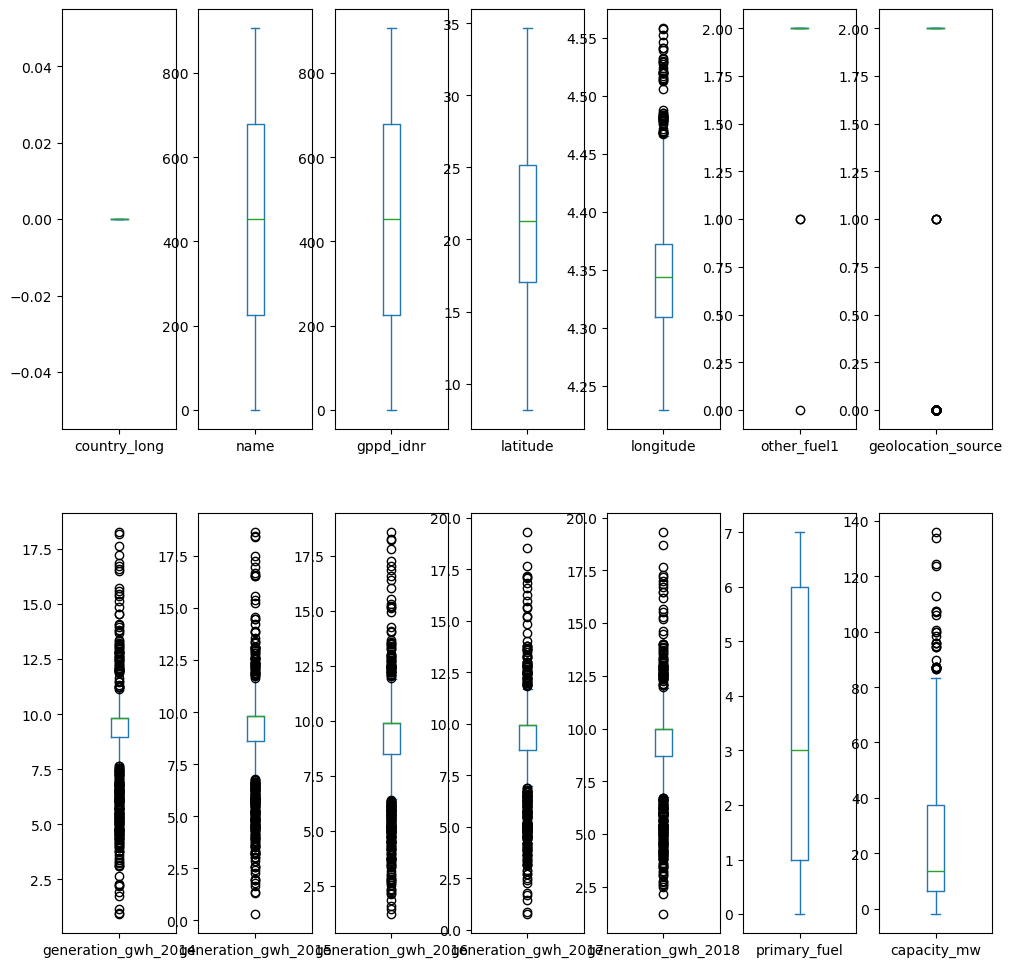

In [142]:
ldf.plot(kind='box',figsize=(12,12),layout=(2,7),subplots=True)

In [143]:
ldf.skew()

country_long            0.000000
name                    0.000000
gppd_idnr               0.000000
latitude               -0.149698
longitude               0.933111
other_fuel1           -20.453120
geolocation_source     -2.159841
generation_gwh_2014    -0.444392
generation_gwh_2015    -0.459390
generation_gwh_2016    -0.432565
generation_gwh_2017    -0.450168
generation_gwh_2018    -0.319412
primary_fuel            0.472251
capacity_mw             1.472953
dtype: float64

Because "other_fuel1" & "geolocation_source" are Catagorical data, but the skewness is coming due to we converted the same to Numeric data via Label Encoder only for making it readable to Machine Learning. So we are not trying to ruduce its skewness.

Other Data Preprocessing & Feature Engineering works have already been done earlier, we are now going to directly apply different Linear Algorithms with many Random States to check and get the best.

In [144]:
lx=ldf.iloc[:,0:-1]

In [145]:
ly=ldf.iloc[:,-1]

In [146]:
lx.shape

(907, 13)

In [147]:
ly.shape

(907,)

In [148]:
lr=LinearRegression()

In [149]:
for i in range(0,50):
    lxtrain,lxtest,lytrain,lytest=train_test_split(lx,ly,test_size=0.30,random_state=i)
    lr.fit(lxtrain,lytrain)
    lpred1=lr.predict(lxtest)
    rscore=r2_score(lytest,lpred1)
    print(rscore)

0.5881522846135921
0.5563594051681715
0.5171095763762379
0.5112472303928687
0.4579664429123127
0.5611785741764351
0.5298645937618165
0.5291771064562927
0.5966724086175994
0.5168314572459152
0.5653489750091576
0.5303875694924756
0.5434287375757023
0.5223963651432982
0.4557734940446413
0.5663672959546922
0.5059416912949749
0.5298242003072124
0.4392423228039909
0.4520076119466896
0.5076064024448435
0.5351785488220535
0.5484718433870468
0.5623903620608455
0.4423413297203992
0.580260926360469
0.447522401003148
0.537365491397904
0.5472122112049373
0.5459427224910841
0.5375534342927129
0.5314234580319315
0.4885031268817984
0.5733898291749466
0.5198212541499043
0.5656719988576812
0.49623006384413937
0.6078196080132446
0.40173896269764375
0.49848743346300206
0.5636889153786524
0.5505819022989575
0.5138953077628996
0.6036839732651154
0.6039549815552387
0.4591300011973718
0.5157209947414342
0.5978054453122734
0.5355826518590567
0.5449573343293069


In [150]:
sv=SVR()

In [151]:
for i in range(0,50):
    lxtrain,lxtest,lytrain,lytest=train_test_split(lx,ly,test_size=0.30,random_state=i)
    sv.fit(lxtrain,lytrain)
    lpred2=sv.predict(lxtest)
    rscore=r2_score(lytest,lpred2)
    print(rscore)

0.14664606522429113
0.13908806814302033
0.13109167039141778
0.1439311890741135
0.20140192178374805
0.17086933356116285
0.21247853212708212
0.11003856129034251
0.1673046768093729
0.12723005126499554
0.17376851505242463
0.15665787518615915
0.2309202782166513
0.17148520339363726
0.14679044731253132
0.20267244542747131
0.17018328058039134
0.13837132882322634
0.2027118849455477
0.16444828794345434
0.10313873525374528
0.16853721283742462
0.16172301838690106
0.16134946657735205
0.22025676358382573
0.14724437082186803
0.17332634610159814
0.12538580926797116
0.12248908821757232
0.14645621270333986
0.15521319274263712
0.1375843585931269
0.18618205627630446
0.19833472079715664
0.15915973178339482
0.11177050234582742
0.12836809500705526
0.16985261878275315
0.18130138004272234
0.1493595258256073
0.11879711681532878
0.04116651487297929
0.12165206753046798
0.18260256433081212
0.18573995520935205
0.2211001222815394
0.1615510702579902
0.1331254814890367
0.15841118312216385
0.08426930071193894


In [152]:
dt=DecisionTreeRegressor()

In [153]:
for i in range(0,50):
    lxtrain,lxtest,lytrain,lytest=train_test_split(lx,ly,test_size=0.30,random_state=i)
    dt.fit(lxtrain,lytrain)
    lpred3=dt.predict(lxtest)
    rscore=r2_score(lytest,lpred3)
    print(rscore)

0.8422328722365221
0.8151755343184005
0.7209496359449465
0.8361186787314013
0.7756275588312347
0.8074970841290141
0.7495739550355525
0.7230710208900926
0.7639217447815599
0.8299521630175345
0.7791029116411544
0.7893530368283497
0.7644901619463036
0.7593422602447579
0.7779450984587332
0.8007292653681739
0.7112096415932585
0.751431938502795
0.7908458556166569
0.7949897076914423
0.7562113800714954
0.7913120829390483
0.7428356821798865
0.8138957582995123
0.7052767150387225
0.7429738281380796
0.7878889703231536
0.7868303760055649
0.7903002387795471
0.7518080105101531
0.8048344082050248
0.7933746080074146
0.7689864109997592
0.7222678059492169
0.7412797359109462
0.6896357606302355
0.6797824921976867
0.7706491431712247
0.7500621140471383
0.7370996871973093
0.7687635548182936
0.7576297599370548
0.7756464517566353
0.7500161574652784
0.7471990898459051
0.7412513379777547
0.7868406265543172
0.8204407312972735
0.7510669024431864
0.7768365148799001


In [154]:
br=BayesianRidge()

In [155]:
for i in range(0,50):
    lxtrain,lxtest,lytrain,lytest=train_test_split(lx,ly,test_size=0.30,random_state=i)
    br.fit(lxtrain,lytrain)
    lpred4=br.predict(lxtest)
    rscore=r2_score(lytest,lpred4)
    print(rscore)

0.5955170153864777
0.5483164672348434
0.5332337262609794
0.5170626026148377
0.45667231540854136
0.5881776386998485
0.5198686845204608
0.5436667177139831
0.6171997082858982
0.5396156748500933
0.5769431712899247
0.5248541231778603
0.5386086103270243
0.5144839389854684
0.45181526551946316
0.5908147667753333
0.5019249599111892
0.5240138312906991
0.4570653713938738
0.45792177819498336
0.5073745946345891
0.5267377433782818
0.5572822667974392
0.5692815081460343
0.4413537593895992
0.6121984420667124
0.4476281554334828
0.5357467575646044
0.5421457176258855
0.5472903075785736
0.5499347530377984
0.5233357493984929
0.48159333035694485
0.5759362538731392
0.5249970537026253
0.569130443639342
0.4904099031362339
0.6026879056387071
0.4059917543318007
0.49651330311832165
0.5666790637773544
0.5479878048331867
0.5105454447318205
0.6197705395653745
0.6156700931803968
0.4606029794351636
0.5176846928220005
0.5941611130189098
0.5599257191739996
0.5661344553814025


In [156]:
gb=GradientBoostingRegressor()

In [157]:
for i in range(0,50):
    lxtrain,lxtest,lytrain,lytest=train_test_split(lx,ly,test_size=0.30,random_state=i)
    gb.fit(lxtrain,lytrain)
    lpred5=gb.predict(lxtest)
    rscore=r2_score(lytest,lpred5)
    print(rscore)

0.8946793259293877
0.8877942848699372
0.8405662241783568
0.8728904761034523
0.87111173854553
0.8767227635665789
0.8519065961266505
0.8640961761528907
0.8643088298539496
0.8596401043431632
0.871391470949653
0.8664034394133453
0.872965935151025
0.8459638479146399
0.8396606991782793
0.897803144797078
0.8219503684622154
0.856876946723421
0.8523269909683948
0.8655960210867382
0.8302048734763364
0.858495500700744
0.8457874281280549
0.8633044975579139
0.8447075601733265
0.8699384032052218
0.8378384742308942
0.8151396406764666
0.8619627713895968
0.8548390817030965
0.8693979076714653
0.8740009024377733
0.8560768269299193
0.8543060114708745
0.8753442695804149
0.8522200134357604
0.8758014721817511
0.8807533832283863
0.8492856208721429
0.8335653910747751
0.8462767748546086
0.8315802305603047
0.8658564498278313
0.8621942511336583
0.8774700167103974
0.8372909969258168
0.8437970056629951
0.8740930762789585
0.8649958531362318
0.8693859923594591


In [158]:
kn=KNeighborsRegressor()

In [159]:
for i in range(0,50):
    lxtrain,lxtest,lytrain,lytest=train_test_split(lx,ly,test_size=0.30,random_state=i)
    kn.fit(lxtrain,lytrain)
    lpred6=kn.predict(lxtest)
    rscore=r2_score(lytest,lpred6)
    print(rscore)

0.34755651967021883
0.26127788769807625
0.3164582422177953
0.2951886644776933
0.3119384695036006
0.4327333951474819
0.2728160866859215
0.3130588310295227
0.3674061774884534
0.2943167554691315
0.24991835665872586
0.3306788723694746
0.3773673138027176
0.28616023813480795
0.2551814973948563
0.36798491514821763
0.33762161091056175
0.2798981917821305
0.39671107796515626
0.3018809445214591
0.3973292334832208
0.3686957484025162
0.28721526576583256
0.2885916860503629
0.26768778976487606
0.22904246115751348
0.26369193073040953
0.33041124771680463
0.34347333486088316
0.28323370370319023
0.3138583312243808
0.31872002267177524
0.23706221154957197
0.4570978154180202
0.3498991369112109
0.2747637677555259
0.27635622268048066
0.3763906196791299
0.24090063639891013
0.30840563761316253
0.29430580078988555
0.28919697577424697
0.31639432493427
0.3626557586497241
0.3798377566205946
0.35261886646079843
0.3672820383514144
0.3631581272913116
0.3453938977194183
0.36119349620641994


In [160]:
ar=AdaBoostRegressor()

In [161]:
for i in range(0,50):
    lxtrain,lxtest,lytrain,lytest=train_test_split(lx,ly,test_size=0.30,random_state=i)
    ar.fit(lxtrain,lytrain)
    lpred7=ar.predict(lxtest)
    rscore=r2_score(lytest,lpred7)
    print(rscore)

0.8411103285538523
0.7498242200826359
0.7763194737712802
0.7750729370062015
0.760174908014855
0.8344297481884325
0.722300117157046
0.7460464921054519
0.7717108642590396
0.8073046982312336
0.6431883372578471
0.7395076307655057
0.7110480648477525
0.7476132247168923
0.6871120729091671
0.8048450855557374
0.7031498889506846
0.7687182034459966
0.7067111365848859
0.8211545110893328
0.7395842959685514
0.7964758953404434
0.7638993361676314
0.7231492488112035
0.7309927520656431
0.7672262543618134
0.7541669226405411
0.7522520457092221
0.7827895059163388
0.7429123890623963
0.8291882956790028
0.7699153943877677
0.8169402734006154
0.7472322930571619
0.8299712076174974
0.8010974817976659
0.7543841851949589
0.7563432145423408
0.6764327192486213
0.7710969702579
0.7731753689836676
0.7878990227135179
0.8137718080362335
0.7740352959341074
0.7810025888670733
0.6830927067969491
0.711114577503485
0.7540467154877548
0.7424096902410051
0.8401621237937152


In [162]:
rf=RandomForestRegressor()

In [163]:
for i in range(0,50):
    lxtrain,lxtest,lytrain,lytest=train_test_split(lx,ly,test_size=0.30,random_state=i)
    rf.fit(lxtrain,lytrain)
    lpred8=rf.predict(lxtest)
    rscore=r2_score(lytest,lpred8)
    print(rscore)

0.9003828545931726
0.8920516458688699
0.8631086737646898
0.8909471280468613
0.8967667778889794
0.8985641779004893
0.8560842302365278
0.8693908784206805
0.8746513135103118
0.8797635647027715
0.8872872035786646
0.8962036739459212
0.8850193843720995
0.8801003453896992
0.8570869989275064
0.9068647947847769
0.8239172337839977
0.8694717557453088
0.8654810654526928
0.8799350847066922
0.840064001255139
0.8596482138786539
0.8564410160626624
0.8793479633945077
0.8600734148551399
0.9008528742240859
0.8414983559816478
0.8457474369276482
0.8669787882128344
0.8788393591627081
0.8775504005475003
0.9010332071848122
0.8644156628333965
0.8467722620829787
0.8818010012626418
0.8720354303543415
0.875832870915974
0.8814267532804263
0.8646051333113504
0.8424697150935541
0.8479658589371682
0.8585306055598615
0.8889716716378016
0.8667473195554785
0.9023555325695156
0.8587000577665045
0.8531209542345655
0.8827158713383395
0.8774600988144103
0.8757157395084212


By applying above linear Algos, we found that Gradient Boosting Regressor (gb) and Random Forest Regressor (rf) is giving more accurate predictions above 85%

In [164]:
mean_absolute_error(lytest,lpred5)

6.554398858916037

In [165]:
mean_absolute_error(lytest,lpred8)

6.324239096707165

Further we have observed that Random Forest Regressor is giving more accurate prediction with less error in compare to Gradient Boosting Regressor. So we are going to do our further process with Random Forest Regression (rf).

We are going to check the Random Forest Regresson (rf) with different Cross Validations.

In [166]:
cv1=cross_val_score(rf,lx,ly,cv=KFold(n_splits=10))

In [167]:
cv1

array([0.87129885, 0.86328187, 0.8698319 , 0.8795789 , 0.77880759,
       0.88999279, 0.81213432, 0.9174964 , 0.86586132, 0.87995826])

In [168]:
cv1.mean()

0.8628242201376966

In [169]:
cv2=cross_val_score(rf,lx,ly,cv=ShuffleSplit(train_size=0.7,test_size=0.3,n_splits=10))

In [170]:
cv2

array([0.87519358, 0.85863867, 0.89876548, 0.86907034, 0.87279509,
       0.85788547, 0.89394003, 0.86134829, 0.83953796, 0.87443344])

In [171]:
cv2.mean()

0.8701608341736234

We are getting a good prediction accuracy of above 86% by both the above Cross Validation with 10 Folds cross check.

In [172]:
gs2=GridSearchCV(estimator=rf,param_grid={'n_estimators':[100,200,300],'max_depth':[None],'max_features':[4,5],'min_samples_split':[8,9,10],'warm_start':[True],'oob_score':[True]},scoring='accuracy',cv=10,n_jobs=-1)

In [173]:
gs2.fit(lxtrain,lytrain)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None], 'max_features': [4, 5],
                         'min_samples_split': [8, 9, 10],
                         'n_estimators': [100, 200, 300], 'oob_score': [True],
                         'warm_start': [True]},
             scoring='accuracy')

In [174]:
HyPred=gs2.best_estimator_.predict(lxtest)

In [175]:
r2_score(lytest,HyPred)

0.8808846512178661

In [176]:
mean_absolute_error(lytest,HyPred)

6.2334983706074185

By using above Hyperparameter Tuning with different param grids, we got the prediction accuracy of above 88%. So we are going to save our Hyperparameter Tuning (gs) Random Forest Regressor for our Regression Model to predict the Capacity Mega Watt of Power Plants.

In [177]:
pickle.dump(gs2, open('capacity mega watt', 'wb'))

In [178]:
gs2_model=pickle.load(open('capacity mega watt', 'rb'))

In [179]:
model_lpred=gs2_model.predict(lxtest)

In [180]:
r2_score(lytest,model_lpred)

0.8808846512178661

We have saved our Random Forest ML Model with Hyperparameter Tuning and got above 88% prediction accuracy by applying the same.